In [2]:
# Machine Learning Online Class - Exercise 1 : Linear Regression

# Instructions
# ------------
#
# This file contains code that helps you get started on the
# linear exercise. You will need to complete the following functions
# in this exercise:
#
#   warmUpExercise.m
#   plotData.m
#   gradientDescent.m
#   computeCost.m
#   gradientDescentMulti.m
#   computeCostMulti.m
#   featureNormalize.m
#   normalEqn.m
#
# For this exercise, you will not need to change any code this file,
# or any other files other than those mentioned above
#
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s
#


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warmUpExercise as warm
import plotData as pd
import computeCost as cc
import gradientDescent as gd
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib.ticker import LinearLocator

In [4]:
## ========================== Part 1 : Basic Function ========================
# Complete warmUpExercise.py

print('Running warmUpExercise...')
print('5x5 Identity Matrix: ')
print(warm.warmUpExercise())
input('Program paused. Press enter to continue.\n')

Running warmUpExercise...
5x5 Identity Matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Program paused. Press enter to continue.



''

In [2]:
## ========================== Part 2 : Plotting ============================
print('Plotting Data...')
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0]
y = data[:,1]
m = len(y) #number of training examples

Plotting Data...


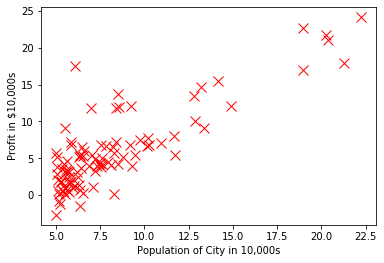

In [3]:
pd.plotData(X,y)

In [7]:
input('Program paused. Press enter to continue.\n')

Program paused. Press enter to continue.



''

In [4]:
## =================================== Part 3 : Cost and Gradient Descent =================================

X = np.column_stack((np.ones((m,1)),X)) # Add a colomn of ones to x
theta = np.zeros((2,1)) #Initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [5]:
# Compute and display initial cost
print(cc.computeCost(X,y,theta))

[32.07273388]


In [8]:
# Run gradient descent
theta = gd.gradientDescent(X, y, theta, alpha, iterations)
# print theta to screen
print('Theta found by gradient descent: ')
print("{:f}, {:f}".format(theta[0,0],theta[1,0]))

Theta found by gradient descent: 
-3.878051, 1.191253
[[-3.87805118]
 [ 1.1912525 ]]


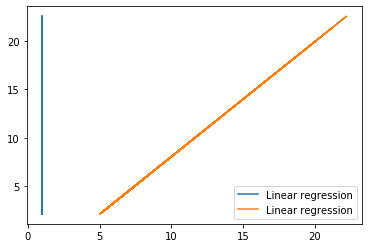

In [13]:
# Plot the linear fit
plt.plot(X,X.dot(theta),'-', label='Linear regression')
plt.legend(loc='lower right')
plt.draw()

In [12]:
# Predict values for population sizes of 35,000 and 70,000
predict1=[]
predict2=[]
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format(float(predict1*10000)))
predict2 = np.array([1,7]).dot(theta)
print("For population = 70,000, we predict a profit of {:f}".format(float(predict2*10000)))
input('Program paused. Press enter to continue.\n')

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
Program paused. Press enter to continue.



''

In [25]:
## ====================== Part 4: Visualizing J(theta_0,theta_1) =======================
print('Visualizing J(theta_0,theta_1)...')

# Grid over which we will calculate J
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

# initialize J Vals to a matrix of 0's
J = np.zeros((len(theta_0), len(theta_1)))

# fill out J vals
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = [[theta_0[i]], [theta_1[j]]]
        J[i,j] = cc.computeCost(X,y,t)

Visualizing J(theta_0,theta_1)...


In [20]:
# Because of the way meshgrids work in the surf command, we need to 
# transpose J value calling surf, or else the axes will be flipped
J_values = np.transpose(J)

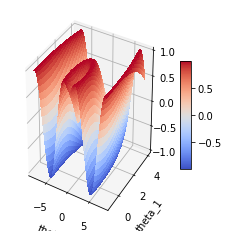

In [21]:
# Surface plot

fig = plt.figure(figsize=plt.figaspect(0.5)) # set up a figure twice as wide as it is tall

ax = fig.add_subplot(1, 2, 1, projection='3d') # set up the axes plot
theta_0, theta_1 = np.meshgrid(theta_0, theta_1) # for 3D Graph
R = np.sqrt(theta_0**2 + theta_1**2)
Z = np.sin(R)
surf= ax.plot_surface(theta_0, theta_1, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(-1.01,1.01)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

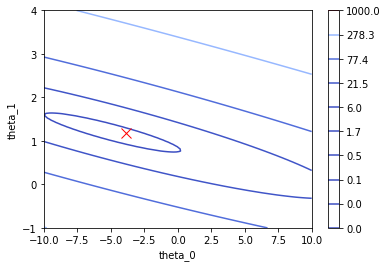

In [28]:
# Contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
cset = plt.contour(theta_0, theta_1, J_values, np.logspace(-2,3,10), cmap=cm.coolwarm)
fig.colorbar(cset)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show()

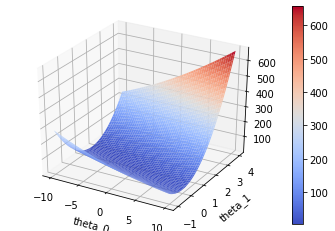

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
surf = ax.plot_surface(theta_0, theta_1, J_values, cmap=cm.coolwarm)
fig.colorbar(surf)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()